<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2021/blob/master/04_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2 - Pandas (First part)
> An introduction on Pandas basics. First, you will become familiar with Pandas and its cornerstone variable types: the *Series* and the *DataFrame*. You will learn how to *import data* with Pandas and some tips to perform DataFrame *preliminary exploration* (including a very basic *visual inspection*). In addition, you will learn how to *access* the data storing in a DataFrame. Finally, you will be introduced to the concepts of DataFrame *boolean indexing* and DataFrame *filtering*.

## Outline TODO
 * [What is Pandas?](#What-is-Pandas?)
 * [Series and DataFrames](#Series-and-DataFrames)
 * [Loading data as a DataFrame](#Loading-data-as-a-DataFrame)
 * [DataFrame basic inspection](#DataFrame-basic-inspection)
 * [DataFrame visual inspection](#DataFrame-visual-inspection)
 * [DataFrame access](#DataFrame-access)
   * [Accessing whole columns](#Accessing-whole-columns)
   * [Accessing whole rows](#Accessing-whole-rows)
   * [Accessing columns and rows simultaneously](#Accessing-columns-and-rows-simultaneously)
 * [DataFrame boolean indexing](#DataFrame-boolean-indexing)
 * [Filtering DataFrames with boolean indexing](#Filtering-DataFrames-with-boolean-indexing)

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

## What is Pandas?

When dealing with numeric matrices and vectors in Python, [NumPy](https://numpy.org/) makes life a lot easier. However, those used to work with dedicated languages like [R](https://www.r-project.org/), doing data analysis directly with NumPy feels like a step back. Fortunately, some nice folks have written the Python Data Analysis Library (a.k.a. [Pandas](http://pandas.pydata.org/)). Pandas provides an R-like DataFrame, produces high quality plots with [matplotlib](https://matplotlib.org/), and integrates nicely with other libraries that expect NumPy arrays.

## Series and DataFrames

Pandas works with `Series` of data, that then are arranged in `DataFrame` objects. A dataframe is the object closest to an Excel spreadsheet that we will see throughout the boot camp. Dataframes, though, given that they are integrated in Python and can be combined with so many different packages, are much more powerful than simple Excel spreadsheets. We use to load Pandas with the `pd` alias:

In [1]:
# Load package with its corresponding alias
import pandas as pd

## Loading data as a DataFrame

In order to load data with Pandas we use functions like [`pd.read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) and [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). As you may have guessed, we choose depending on the format of our input data. For example, `pd.read_excel()` works with `xlsx`, `xls`... `pd.read_csv()` with `csv`, `tsv`, `txt`...

These functions have multiple arguments providing great flexibility when importing data, like skipping some rows/columns, specifying the column delimiter or picking a particular sheet within a spreadsheet. Let's begin by importing [`ToySpreadsheet.xlsx`](MMRES-python-bootcamp2022/datasets/ToySpreadsheet.xlsx) from `/MMRES-python-bootcamp2022/datasets` sub-folder:

In [2]:
# Reading an Excel SpreadSheet and storing it in as a DataFrame called `df`
df = pd.read_excel(io='datasets/ToySpreadsheet.xlsx')

# Return the DataFrame
df

,Raw,Software,Node,Sequence,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,PEPTIDE,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,PEPTIDE,72.714405,1.226853
2,1985-04-06_0123_GA_T_R3,PD,Amanda,PEPTIDE,133.493350,1.768732
3,1985-04-06_0123_GA_T_R4,PD,Amanda,PEPTIDE,62.007904,1.331619
4,1985-04-06_0123_GA_C_R1,PD,Sequest,PEPTIDE,112.643842,1.853473
5,1985-04-06_0123_GA_C_R2,PD,Sequest,PEPTIDE,116.570249,1.821342
6,1985-04-06_0123_GA_T_R3,PD,Sequest,PEPTIDE,NaN,1.406125
7,1985-04-06_0123_GA_T_R4,PD,Sequest,PEPTIDE,64.983534,1.903608
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,PEPTIDE,97.934919,1.437262
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,PEPTIDE,93.601301,1.647577


In [3]:
# Get the data type of `df`
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## DataFrame basic inspection

Usually, the first thing one should do with a new DataFrame is getting familiar with the its data. Pandas DataFrame objects have many *methods* to this aim, like [`.head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [`.tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html), [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)...


In [4]:
# DataFrame head
df.head()

,Raw,Software,Node,Sequence,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,PEPTIDE,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,PEPTIDE,72.714405,1.226853
2,1985-04-06_0123_GA_T_R3,PD,Amanda,PEPTIDE,133.493350,1.768732
3,1985-04-06_0123_GA_T_R4,PD,Amanda,PEPTIDE,62.007904,1.331619
4,1985-04-06_0123_GA_C_R1,PD,Sequest,PEPTIDE,112.643842,1.853473


In [5]:
# DataFrame tail
df.tail()

,Raw,Software,Node,Sequence,Intensity,Amplitude
7,1985-04-06_0123_GA_T_R4,PD,Sequest,PEPTIDE,64.983534,1.903608
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,PEPTIDE,97.934919,1.437262
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,PEPTIDE,93.601301,1.647577
10,1985-04-06_0123_GA_T_R3,MQ,Andromeda,PEPTIDE,84.169260,1.981663
11,1985-04-06_0123_GA_T_R4,MQ,Andromeda,PEPTIDE,144.019781,1.671251


In [6]:
# DataFrame (basic) statistical description for numeric columns
df.describe()

,Intensity,Amplitude
count,11.000000,12.000000
mean,102.221219,1.631584
std,29.897232,0.244063
min,62.007904,1.226853
25%,78.441833,1.429478
50%,97.934919,1.659414
75%,125.031799,1.829375
max,144.019781,1.981663


The [`.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method is particularly useful. It gives the names *columns*, the data type stored in each column and the memory devoted to store the DataFrame. It also shows the number of non-null values by column, from which we can easily estimate the number of *missing values* (`NaN`) by column.

In [7]:
# DataFrame general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Raw        12 non-null     object 
 1   Software   12 non-null     object 
 2   Node       12 non-null     object 
 3   Sequence   12 non-null     object 
 4   Intensity  11 non-null     float64
 5   Amplitude  12 non-null     float64
dtypes: float64(2), object(4)
memory usage: 704.0+ bytes


In addition to these methods, Pandas DataFrame objects very useful have *attributes* like [`.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) and 
[`.index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html):

In [8]:
# DataFrame shape. Remember: (Rows, Columns)
df.shape

(12, 6)

In [9]:
# DataFrame columns
df.columns

Index(['Raw', 'Software', 'Node', 'Sequence', 'Intensity', 'Amplitude'], dtype='object')

In [10]:
# DataFrame rows
df.index

RangeIndex(start=0, stop=12, step=1)

<div class="alert alert-block alert-info"><b>Tip:</b>

Like *methods*, *attributes* are invoked with the dot `.` symbol. In general, *methods* are invoked with a parenthesis (like `.info()`) and *attributes* without them (like `.shape`). Intuitively, you can consider the *attributes* of a Python object as <ins>things it has</ins>, and *methods* as <ins>things it does</ins>. For example, we could imagine a Python object called `cat` with some attributes and methods.
+ Atributes: `cat.age`, `cat.weight`, `cat.gender`, `cat.personality`, `cat.eye_color`, `cat.coat_pattern`, ...
+ Methods: `cat.purr()`, `cat.meow()`, `cat.chirp()`, `cat.eat()`, `cat.sleep()`, `cat.scratch()`, ...
</div>

## DataFrame visual inspection

After a basic DataFrame inspection, we can start with a visual exploration. To this aim we can levergae the Pandas DataFrame method [`.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and its related "submethods" [`.line()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html), [`.bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html), [`.barh()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html), [`.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html), [`.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html), [`.density()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html), [`.area()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html), [`.pie()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html), [`.scatter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html), [`.hexbin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html), ...

<AxesSubplot:>

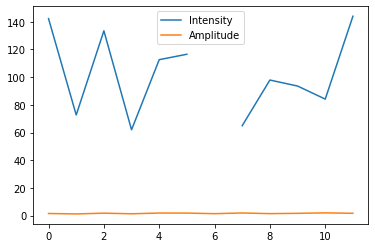

In [11]:
# DataFrame line plot
df.plot.line()

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1st code cell below, get a box plot for the DataFrame `df`.

</div>

In [12]:
# Generate a box plot for `df`


<AxesSubplot:>

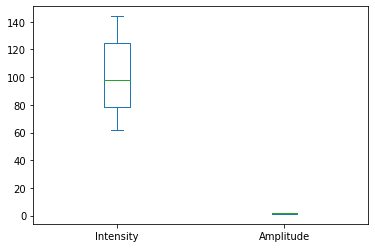

In [13]:
# Generate a box plot for `df`
df.plot.box()

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1st code cell below, get a scatter plot for the DataFrame `df`. What happened?
2) Try again buy this time declaring `x=` and `y=` parameters for the `.scatter()` method.

</div>

In [14]:
# Generate a scatter plot for `df`


<AxesSubplot:xlabel='Intensity', ylabel='Amplitude'>

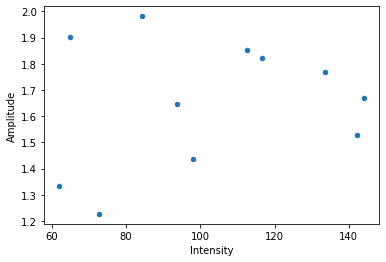

In [15]:
# Generate a scatter plot for `df`
df.plot.scatter(x='Intensity', y='Amplitude')

## DataFrame access

We can get the information stored in a DataFrame by multiple ways, here we will present the accession by brackets `[]` syntax.

### Accessing whole columns

In order to access rows, we need to use the brackets syntax: `df[]`. Passing a list of column names inside the brackets grants you access to such columns. Note that there are two pairs of brackets, one enclosing the list of column names (innermost) and one given access to DataFrame columns (outermost):

In [16]:
# Accessing DataFrame columns
df[['Raw', 'Intensity']]

,Raw,Intensity
0,1985-04-06_0123_GA_C_R1,142.294863
1,1985-04-06_0123_GA_C_R2,72.714405
2,1985-04-06_0123_GA_T_R3,133.493350
3,1985-04-06_0123_GA_T_R4,62.007904
4,1985-04-06_0123_GA_C_R1,112.643842
5,1985-04-06_0123_GA_C_R2,116.570249
6,1985-04-06_0123_GA_T_R3,NaN
7,1985-04-06_0123_GA_T_R4,64.983534
8,1985-04-06_0123_GA_C_R1,97.934919
9,1985-04-06_0123_GA_C_R2,93.601301


### Accessing whole rows

In order to access rows, we need to use [`.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) followed by the brackets syntax: `df.loc[]`. Passing a list of row indexes inside the brackets grants you access to such rows. Again, note that there are two pairs of brackets, one enclosing the list of row indexes (innermost) and one given access to DataFrame rows (outermost):

In [17]:
# Accessing DataFrame rows
df.loc[[4, 1]]

,Raw,Software,Node,Sequence,Intensity,Amplitude
4,1985-04-06_0123_GA_C_R1,PD,Sequest,PEPTIDE,112.643842,1.853473
1,1985-04-06_0123_GA_C_R2,PD,Amanda,PEPTIDE,72.714405,1.226853


### Accessing columns and rows simultaneously

If we want to access the intersection of some columns and rows, we use [`.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) followed by the brackets syntax with a comma inside: `df.loc[ , ]`. The list with the rows we wants goes to the left of the comma and the list with the columns to the right:

In [18]:
# Accessing multiple DataFrame rows and columns simultaneously
df.loc[[4, 1],  ['Raw', 'Intensity']]

,Raw,Intensity
4,1985-04-06_0123_GA_C_R1,112.643842
1,1985-04-06_0123_GA_C_R2,72.714405


As usual, you can first put your lists into a variables before accessing:

In [19]:
# Accessing DataFrame columns specifying first the list of indices and columns we want
rows = [4, 1]
cols = ['Raw', 'Intensity']
df.loc[rows, cols]

,Raw,Intensity
4,1985-04-06_0123_GA_C_R1,112.643842
1,1985-04-06_0123_GA_C_R2,72.714405


TODO

Some Series methods?
quantile()
sum()
min()
max()
mean()

TODO

## DataFrame boolean indexing

Do you remember the six *comparison operators*? 
+ `==`: Equal.
+ `!=`: Not equal.
+ `>`: Greater than.
+ `<`: Less than.
+ `>=`: Greater than or equal to.
+ `<=`: Less than or equal to.

We can use them to know which DataFrame rows affirmatively *answer* our *question*:

In [20]:
# Is the current index 'Intensity' greater than 100?
df['Intensity'] > 100

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11     True
Name: Intensity, dtype: bool

Furthermore, can use the *logical operators* `and`, `or`, `not`, but in their *bitwise* form `&`, `|`, `~`, respectively to link multiple "questions".

<div class="alert alert-block alert-danger"><b>Caveat:</b>

Keep in mind that DataFrame "questions" should be enclosed by parenthesis before linking them using `&`, `|`, `~`.

</div>

In [21]:
# Is the current index 'Intensity' greater than 100 AND 'Amplitude' smaller than 1.6?
(df['Intensity'] > 100) & (df['Amplitude'] < 1.6)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [22]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
(df['Software'] != 'PD') | (df['Node'] == 'Amanda')

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
dtype: bool

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1st code cell below, ask our DataFrame `df` to get which rows present an `'Intensity'` lower than `90` **or** higher than `140`, **and**, a `'Node'` named `'Andromeda'` **or** `'Amanda'`.
2) Inspect the DataFrame `df` and verify that boolean indexation is giving the correct answers.    

Un-comment and fill only those code lines with underscores `___`.
</div>

In [23]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
#print(( (df['Intensity'] _ ___) _ (df['Intensity'] _ ___) ) & ( (df['Node'] _ '___') _ (df['Node'] _ '___') ))

# Return the DataFrame
# df

In [24]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
print(( (df['Intensity'] > 140) | (df['Intensity'] < 90) ) & ( (df['Node'] == 'Andromeda') | (df['Node'] == 'Amanda') ))

# Return the DataFrame
df

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
dtype: bool


,Raw,Software,Node,Sequence,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,PEPTIDE,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,PEPTIDE,72.714405,1.226853
2,1985-04-06_0123_GA_T_R3,PD,Amanda,PEPTIDE,133.493350,1.768732
3,1985-04-06_0123_GA_T_R4,PD,Amanda,PEPTIDE,62.007904,1.331619
4,1985-04-06_0123_GA_C_R1,PD,Sequest,PEPTIDE,112.643842,1.853473
5,1985-04-06_0123_GA_C_R2,PD,Sequest,PEPTIDE,116.570249,1.821342
6,1985-04-06_0123_GA_T_R3,PD,Sequest,PEPTIDE,NaN,1.406125
7,1985-04-06_0123_GA_T_R4,PD,Sequest,PEPTIDE,64.983534,1.903608
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,PEPTIDE,97.934919,1.437262
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,PEPTIDE,93.601301,1.647577


## Filtering DataFrames with boolean indexing

You can store the output of a boolean indexing into a variable:

In [25]:
# Create filter to get Proteome Discoverer software AND no to get Amanda search node.
bool_series = (df['Software'] == 'PD') & (df['Node'] != 'Amanda')

# Get the variable type of `bool_series`
type(bool_series)

pandas.core.series.Series

Note that the output of a boolean indexation (question) is a Pandas Series, in particular a Series full of boolean values, aka *boolean Series* (answer). We can use such *boolean Series* to easily filter *DataFrames* in a very flexible way:

In [26]:
# Applying my (first) filter to my DataFrame
df[bool_series]

,Raw,Software,Node,Sequence,Intensity,Amplitude
4,1985-04-06_0123_GA_C_R1,PD,Sequest,PEPTIDE,112.643842,1.853473
5,1985-04-06_0123_GA_C_R2,PD,Sequest,PEPTIDE,116.570249,1.821342
6,1985-04-06_0123_GA_T_R3,PD,Sequest,PEPTIDE,NaN,1.406125
7,1985-04-06_0123_GA_T_R4,PD,Sequest,PEPTIDE,64.983534,1.903608


<div class="alert alert-block alert-info"><b>Tip:</b>

You can rethink a *boolean Series* as a dataFrame "mask" that leaves uncovered only those rows of your interest.

</div>

<div class="alert alert-block alert-success"><b>Practice:</b>

In the 1st code cell below, we computed the 60% quantile of the 'Intensity' `I_quantile` and the 40% quantile of the 'Amplitude' `A_quantile`. Use this two variables that we have prepared for you to:
    
1) In the 2nd code cell below, create a boolean Series called `first_filter` to filter high intensity values (` > I_quantile`) or low amplitude values (` < A_quantile`) from the DataFrame `df`.
2) In the 3rd code cell below, use `first_filter` to get your rows of interest from the *DataFrame* `df`.
3) What you should change when creating `first_filter` if you would prefer high intensity values *and* low amplitude values (instead of *or*). Create a boolean Series called `second_filter` for this purpose in the 3rd cell below, and get your new rows of interest from the *DataFrame* `df`.
    
Un-comment and fill only those code lines with underscores `___`.
</div>

In [27]:
# Retrieving the 60% quantile of the 'Intensity': I_quantile
I_quantile = df['Intensity'].quantile(0.60)
print(I_quantile)

# Retrieving the 40% quantile of the 'Amplitude': A_quantile
A_quantile = df['Amplitude'].quantile(0.40)
print(A_quantile)

112.64384197882998
1.5767333454207706


In [28]:
# Create filter to get high peak intensity (first 60% quantile) OR low peak amplitude (last 40% quantile)
#first_filter = 

# Applying first filter to DataFrame
#df[___]

In [29]:
# Create filter to get high peak intensity (first quantile) OR low peak amplitude (last quantile)
first_filter = (df['Intensity'] > I_quantile) | (df['Amplitude'] < A_quantile)

# Applying first filter to DataFrame
df[first_filter]

,Raw,Software,Node,Sequence,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,PEPTIDE,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,PEPTIDE,72.714405,1.226853
2,1985-04-06_0123_GA_T_R3,PD,Amanda,PEPTIDE,133.493350,1.768732
3,1985-04-06_0123_GA_T_R4,PD,Amanda,PEPTIDE,62.007904,1.331619
5,1985-04-06_0123_GA_C_R2,PD,Sequest,PEPTIDE,116.570249,1.821342
6,1985-04-06_0123_GA_T_R3,PD,Sequest,PEPTIDE,NaN,1.406125
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,PEPTIDE,97.934919,1.437262
11,1985-04-06_0123_GA_T_R4,MQ,Andromeda,PEPTIDE,144.019781,1.671251


In [30]:
# Create filter to get high peak intensity (first 60% quantile) AND low peak amplitude (last 40% quantile)
#second_filter = 

# Applying second filter to DataFrame
#df[___]

In [ ]:
# Create filter to get high peak intensity (first quantile) AND low peak amplitude (last quantile)
second_filter = (df['Intensity'] > I_quantile) & (df['Amplitude'] < A_quantile)

# Applying second filter to DataFrame
df[second_filter]